In [1]:
#coding:utf-8
import sys; reload(sys); print sys.setdefaultencoding('utf-8')
from pandas import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
ft = mpl.font_manager.FontProperties(fname='/Library/Fonts/Songti.ttc')

In [3]:
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [4]:
!ls

## 数据读取及清洗

### 读取数据

In [5]:
df = read_csv('taobao.csv')
df = df.drop_duplicates()  # 去重

In [86]:
df.to_csv('/Users/yeqing/projects/taixiangny/merchants/merchants/data/taobao.20161011.csv', index=0)

### 计算附加指标

In [91]:
df['discount'] = df['reserve_price'] - df['view_price']  # 打折金额
df['discount_pct'] = df['discount'] / df['reserve_price']  # 打折百分比
df['total_price'] = df['view_price'] + df['view_fee']  # 总金额: 展现价格+邮费
df['sales_amount_30d'] = df['view_price'] * df['view_sales']  # 销售总金额: 展现价格 * 过去30天销售量. (假设均价为展现价格)
df['is_wild'] = df['raw_title'].str.contains('野生')

### 转化数据类别

In [7]:
# 原始数据类别
df.dtypes.sort_index()

category                 float64
comment_count            float64
discount                 float64
discount_pct             float64
id                         int64
is_ad                       bool
is_tmall                    bool
item_loc                  object
pic_url                   object
query                     object
rank                       int64
raw_title                 object
reserve_price            float64
sales_amount_30d         float64
sc_delivery_pct            int64
sc_delivery_rating         int64
sc_description_pct         int64
sc_description_rating      int64
sc_service_pct             int64
sc_service_rating          int64
shop_id                    int64
shop_name                 object
shop_url                  object
title                     object
total_price              float64
unit_price               float64
url                       object
view_fee                 float64
view_price               float64
view_sales                 int64
weight    

In [92]:
met_vars = [
    'view_price',
    'reserve_price',
    'view_fee',
    'total_price',
    'discount',
    'discount_pct',
    'unit_price',
    'weight',
    'view_sales',
    'sales_amount_30d',
    'comment_count',
    'sc_delivery_pct',
    'sc_delivery_rating',
    'sc_description_pct',
    'sc_description_rating',
    'sc_service_pct',
    'sc_service_rating',
    'rank',
]
id_vars = [
    'id',
    'title',
    'raw_title',
    'url',
    'pic_url',
    'shop_url',
]
cat_vars = [
    'query',
    'is_tmall',
    'category',
    'item_loc',
    'shop_id',
    'shop_name',
    'is_ad',
    'is_wild',
]

In [93]:
for v in met_vars:
    df[v] = df[v].astype(float)
for v in cat_vars:
    df[v] = df[v].astype(str).astype('category')

for v in id_vars:
    df[v] = df[v].astype(str).astype('category')

In [94]:
# 转化后数据类别
df.dtypes.sort_index()

category                 category
comment_count             float64
discount                  float64
discount_pct              float64
id                       category
is_ad                    category
is_tmall                 category
is_wild                  category
item_loc                 category
pic_url                  category
query                    category
rank                      float64
raw_title                category
reserve_price             float64
sales_amount_30d          float64
sc_delivery_pct           float64
sc_delivery_rating        float64
sc_description_pct        float64
sc_description_rating     float64
sc_service_pct            float64
sc_service_rating         float64
shop_id                  category
shop_name                category
shop_url                 category
title                    category
total_price               float64
unit_price                float64
url                      category
view_fee                  float64
view_price    

In [95]:
df.describe(include='all').T.sort_index()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
category,7703,148,50050720.0,2113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comment_count,5160,NaN,NaN,NaN,114.836,614.305,0,NaN,NaN,NaN,17120
discount,7703,NaN,NaN,NaN,14.5001,55.7852,0,0,0,10.2,1931
discount_pct,7703,NaN,NaN,NaN,0.168957,0.242929,0,0,0,0.366667,0.956456
id,7703,7696,538858556659,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_ad,7703,2,False,7701,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_tmall,7703,2,False,7087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_wild,7703,2,False,5894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_loc,7703,301,浙江 杭州,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pic_url,7703,7261,//g-search3.alicdn.com/img/bao/uploaded/i4/i3/...,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Helper Functions

In [12]:
def remove_outliers(df, v):
    _df = df[~np.isnan(df[v])]
    upper = np.percentile(_df[v], 99)
    lower = np.percentile(_df[v], 1)
    return _df[
        (_df[v] < upper) * 
        (_df[v] > lower)
    ]

## 分析 - 羊肚菌

In [140]:
df_y['sales_amount_30d'].sum()

664117.41999999993

In [96]:
df_y = df[df['query'] == '羊肚菌']

In [14]:
df_y.describe(include='all').T.sort_index()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
category,3299,144,50009778.0,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comment_count,1188,NaN,NaN,NaN,6.69781,24.1663,0,NaN,NaN,NaN,319
discount,3299,NaN,NaN,NaN,17.1331,81.2349,0,0,0,0,1931
discount_pct,3299,NaN,NaN,NaN,0.0509108,0.143759,0,0,0,0,0.893981
id,3299,3295,20255583975,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_ad,3299,2,False,3298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_tmall,3299,2,False,3009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_loc,3299,209,广东 广州,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pic_url,3299,2874,//g-search3.alicdn.com/img/bao/uploaded/i4/i3/...,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
query,3299,1,羊肚菌,3299,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_y.describe().T.sort_index()

,count,mean,std,min,25%,50%,75%,max
comment_count,1188.0,6.697811,24.166275,0.00,NaN,NaN,NaN,319.000000
discount,3299.0,17.133110,81.234884,0.00,0.0,0.0,0.0,1931.000000
discount_pct,3299.0,0.050911,0.143759,0.00,0.0,0.0,0.0,0.893981
rank,3299.0,1646.151258,952.530606,1.00,821.5,1646.0,2470.5,3296.000000
reserve_price,3299.0,439.834498,5118.086831,0.01,30.0,138.0,300.0,250000.000000
sales_amount_30d,3299.0,201.308706,1269.767860,0.00,0.0,0.0,0.0,27456.000000
sc_delivery_pct,3299.0,3613.724159,3983.452765,0.00,100.0,1612.0,7492.0,10000.000000
sc_delivery_rating,3299.0,413.501970,172.621695,0.00,472.0,484.0,495.0,500.000000
sc_description_pct,3299.0,3521.088815,4025.888719,0.00,74.5,1212.0,7714.0,10000.000000
sc_description_rating,3299.0,412.659594,172.568086,0.00,468.0,486.0,496.0,500.000000


### 单变量分析 - 羊肚菌

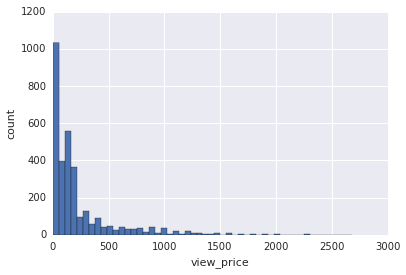

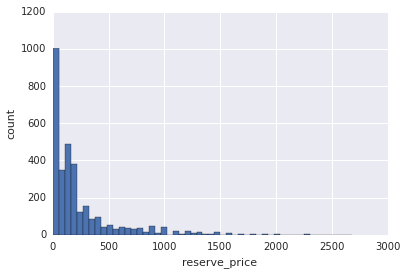

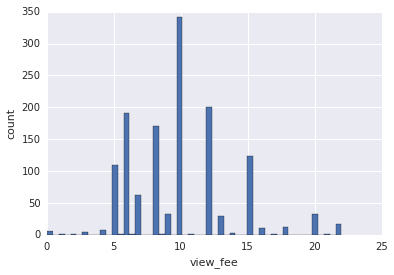

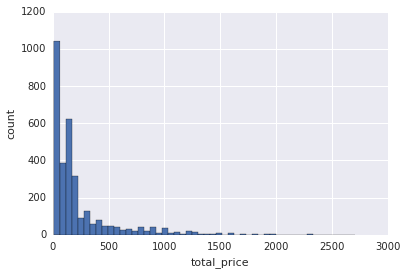

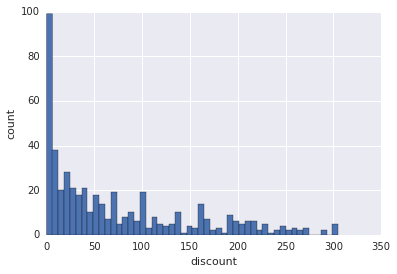

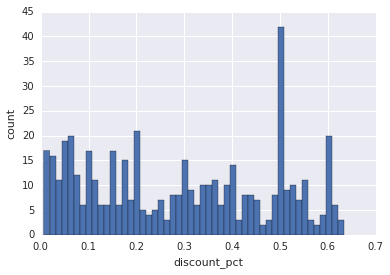

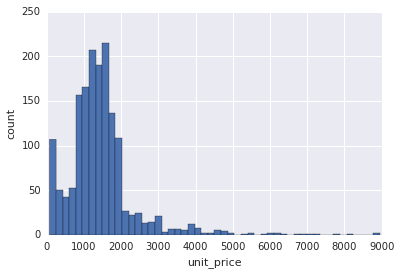

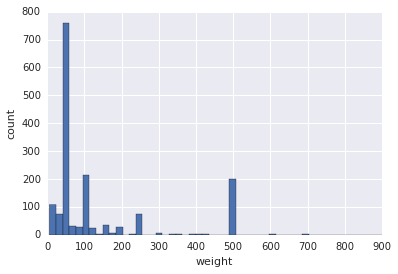

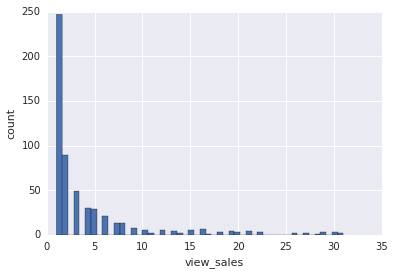

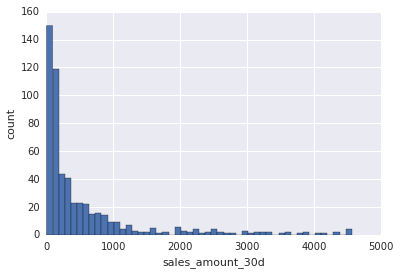

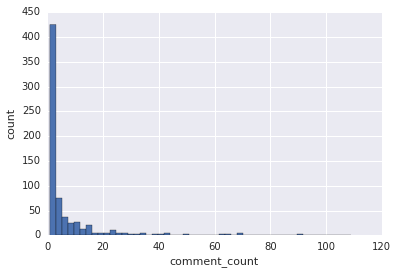

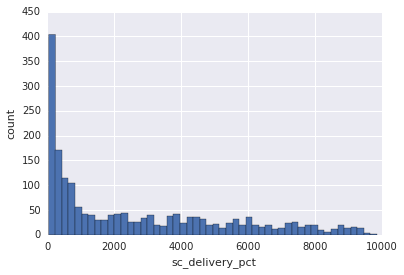

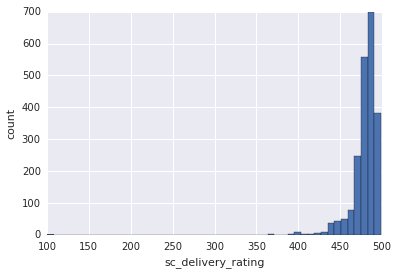

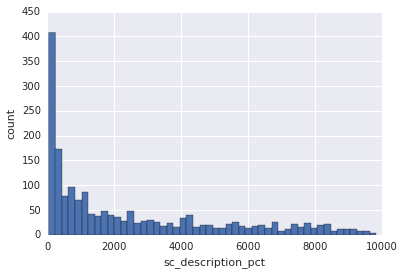

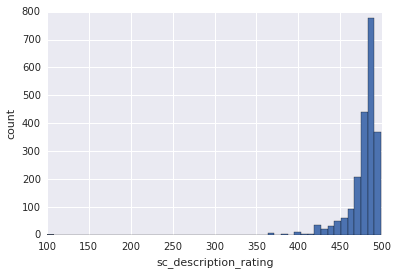

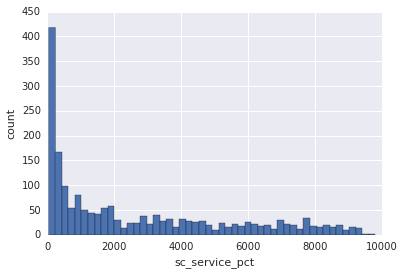

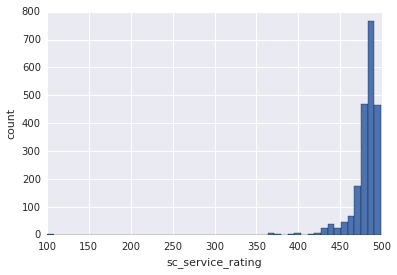

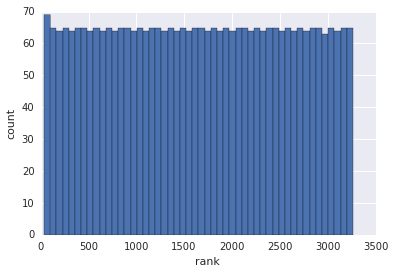

In [83]:
# finer tuned histogram
for v in met_vars:
    _df = remove_outliers(df_y, v)
    _df[v].hist(bins=50)
    print '\n\n'
    print DataFrame(_df[v].describe()).T
    plt.xlabel(v)
    plt.ylabel('count')
    plt.show()

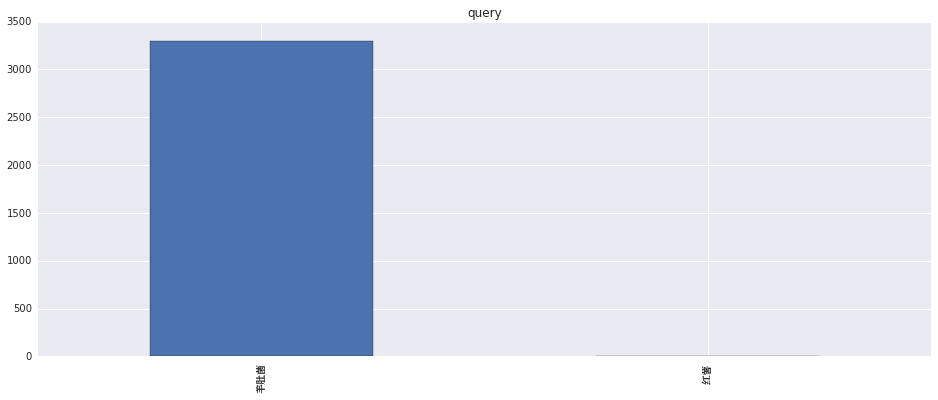

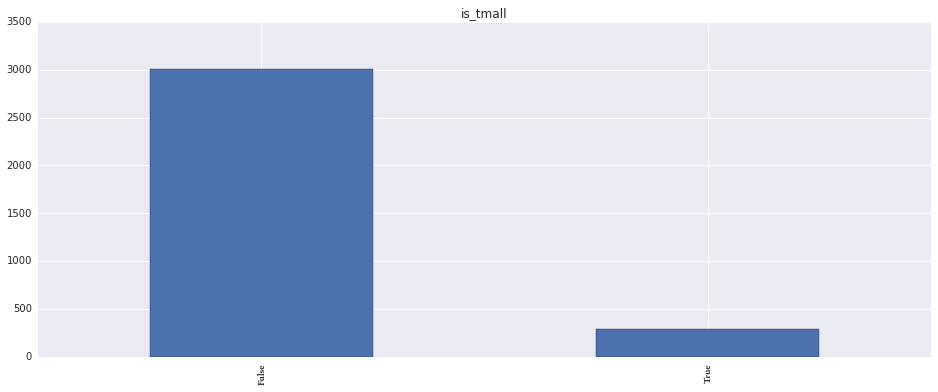

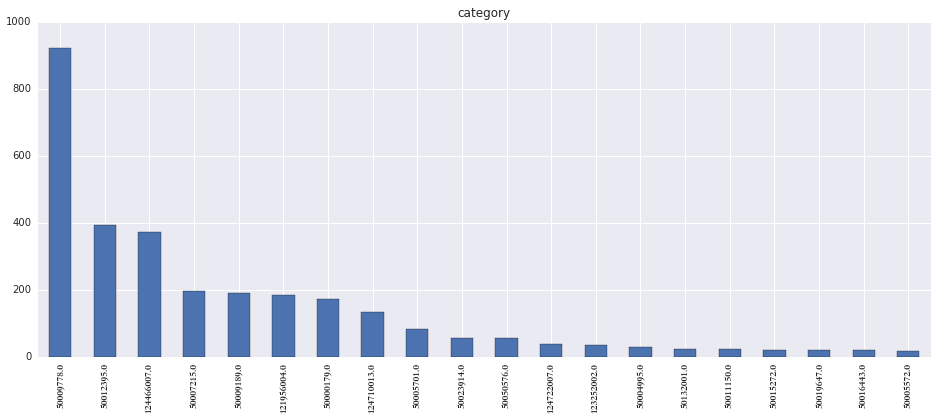

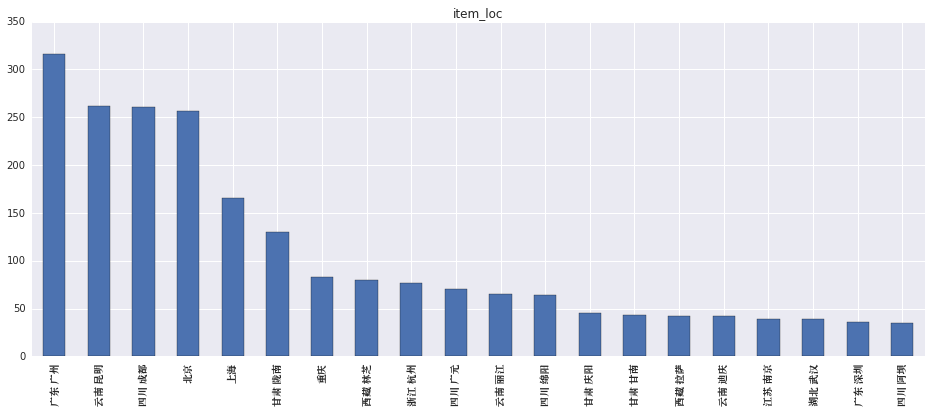

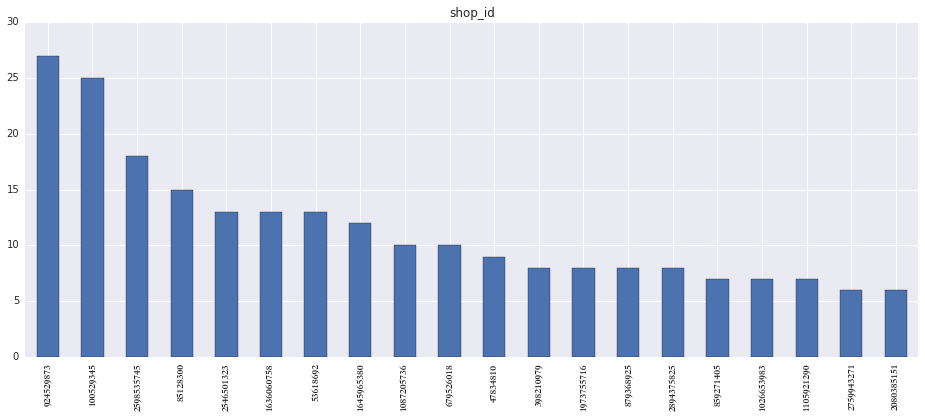

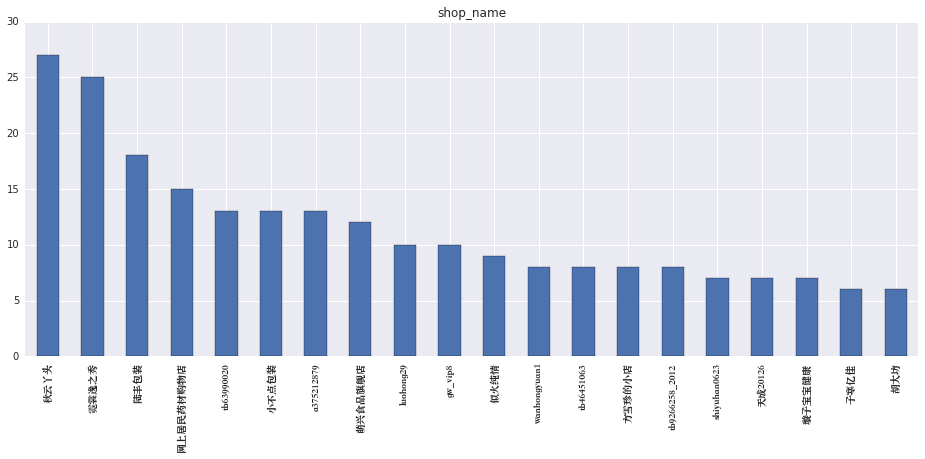

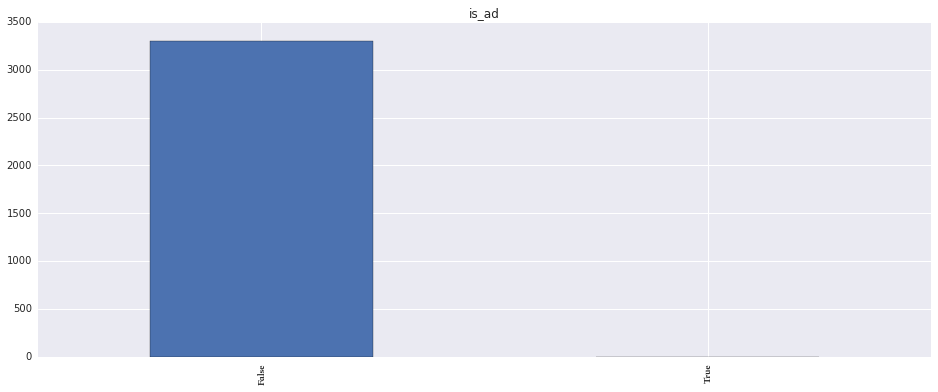

In [17]:
for v in cat_vars:
    idx = df_y[v].value_counts().index.tolist()[:20]
    _df = df_y[v].value_counts().ix[idx]
    plt.figure(figsize=(16, 6))
    _df.plot(kind='bar')
    plt.xticks(range(len(_df.index)), _df.index, fontproperties=ft)
    plt.title(v)
    plt.show()

### 双变量分析 - 羊肚菌

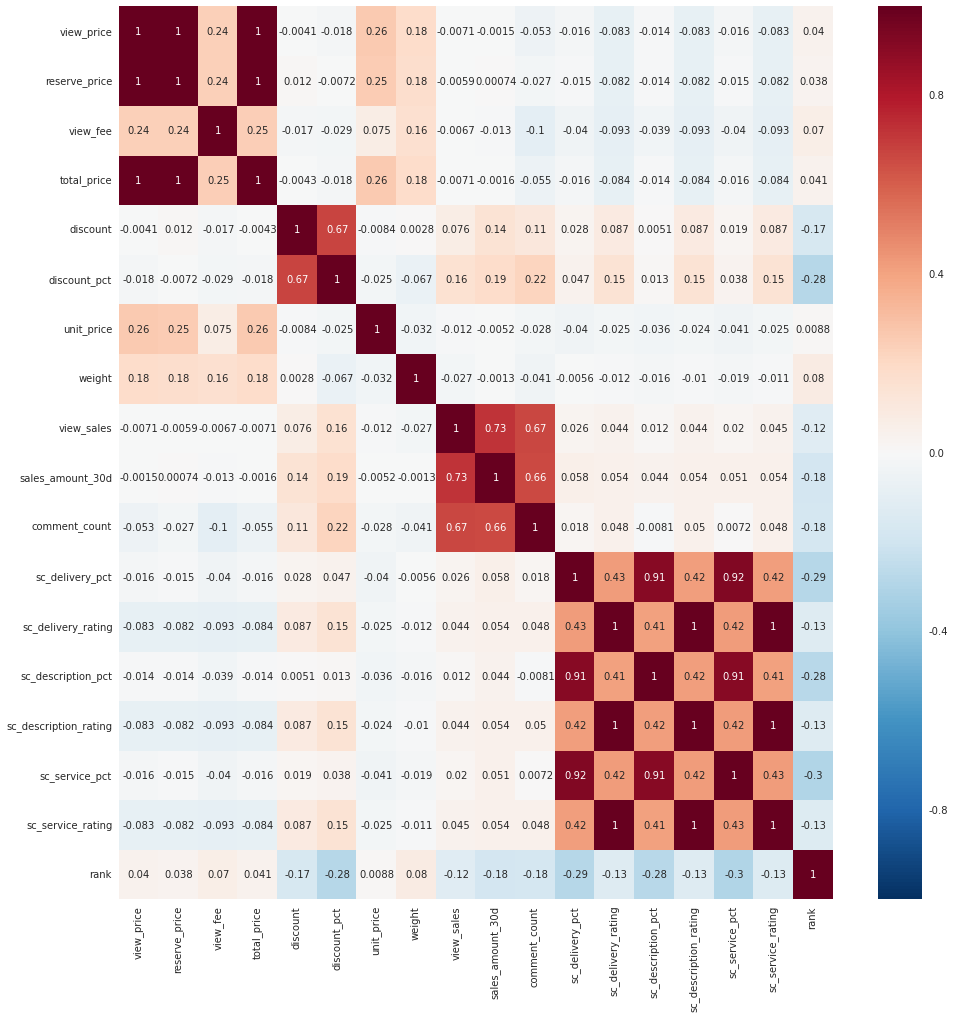

In [18]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_y[met_vars].corr(), annot=True)

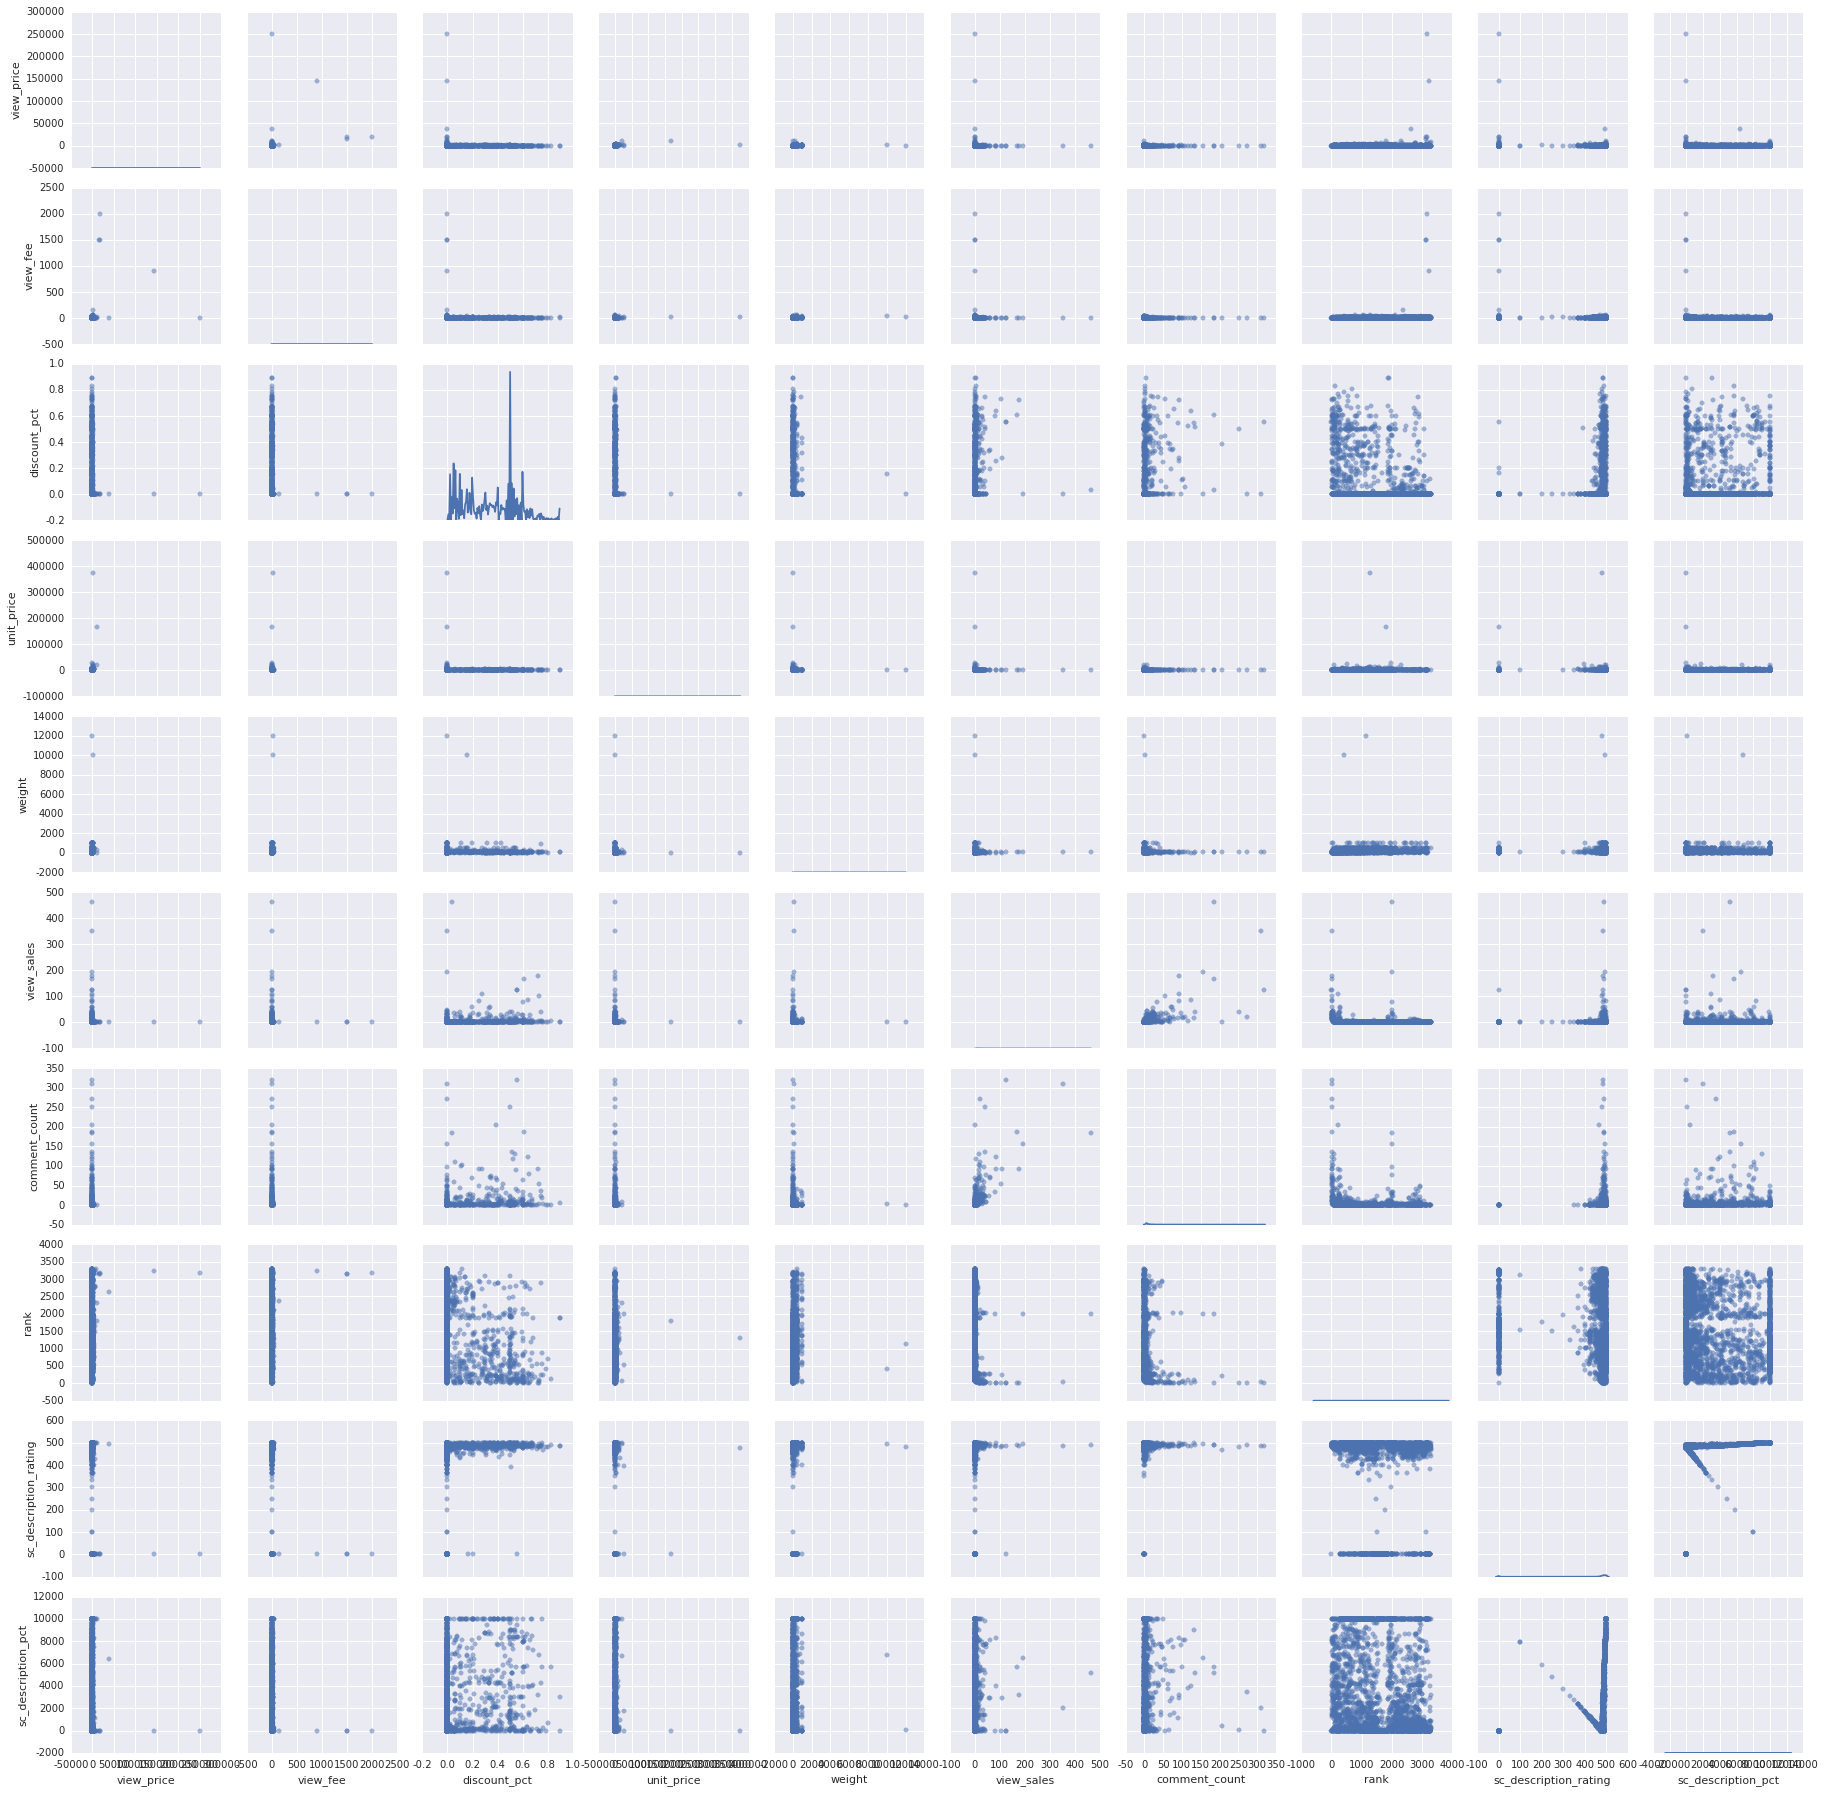

In [19]:
_vars = [
    'view_price',
    'view_fee',
    'discount_pct',
    'unit_price',
    'weight',
    'view_sales',
    'comment_count',
    'rank',
    'sc_description_rating',
    'sc_description_pct',
]
g = sns.PairGrid(df_y, vars=_vars)
g.map_offdiag(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot)

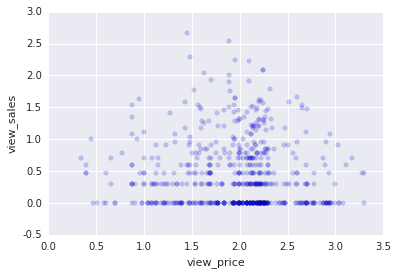

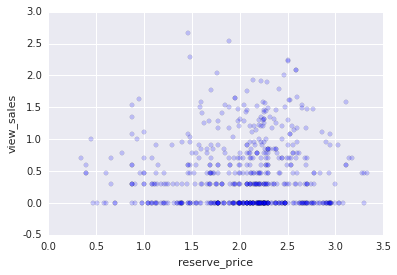

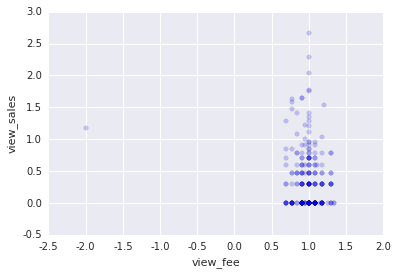

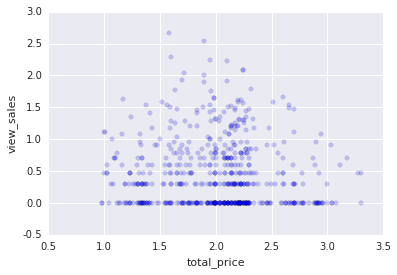

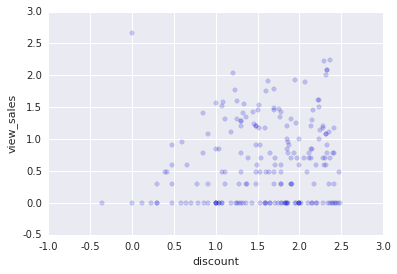

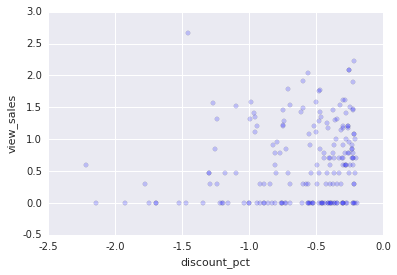

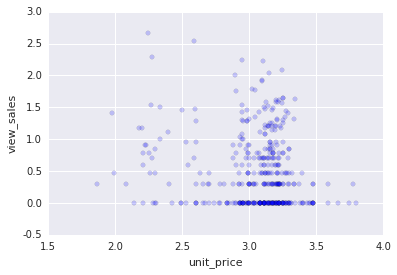

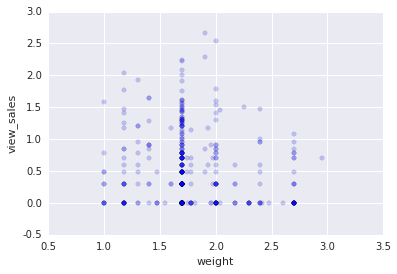

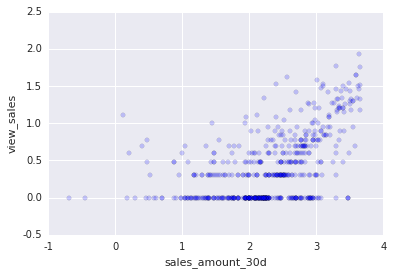

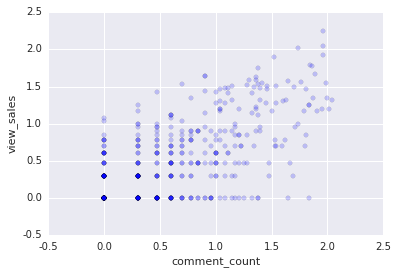

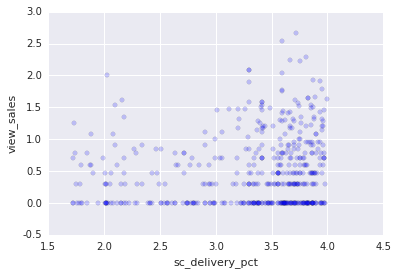

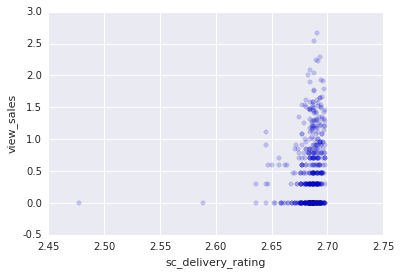

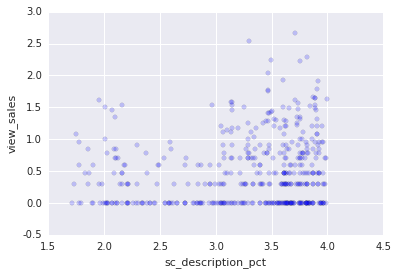

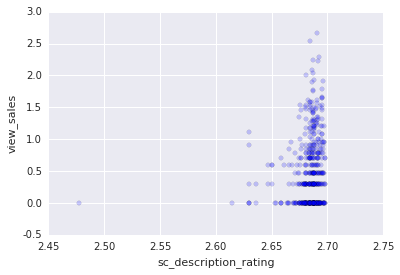

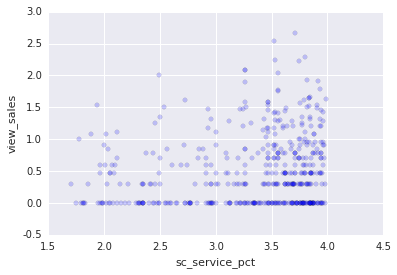

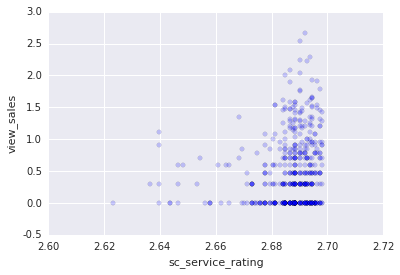

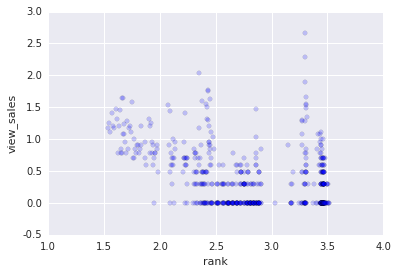

In [20]:
for v in met_vars:
    if v == 'view_sales':
        continue
    _df = remove_outliers(df_y, v)
#     plt.scatter(_df[v], _df['view_sales'], alpha=0.5)
    plt.scatter(np.log10(_df[v]), np.log10(_df['view_sales']), alpha=0.2)
    plt.xlabel(v)
    plt.ylabel('view_sales')
    plt.show()

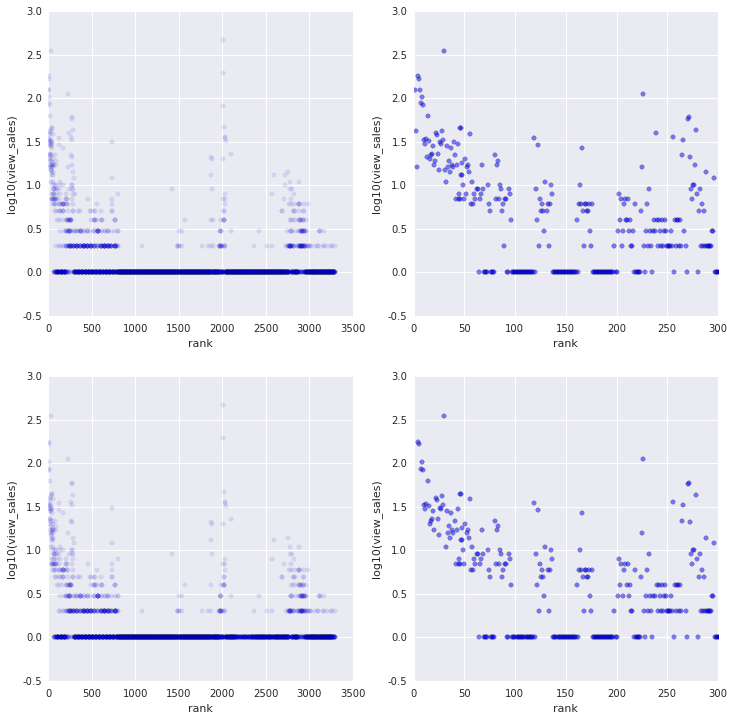

In [61]:
# plt.scatter(df_y['rank'], df_y['view_sales'], alpha=0.2)
# plt.scatter(np.log10(df_y['rank']), df_y['view_sales'], alpha=0.2)
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(df_y['rank'], np.log10(df_y['view_sales']+1), alpha=0.1)
plt.xlabel('rank')
plt.ylabel('log10(view_sales)')
plt.xlim(0, 3500)

plt.subplot(222)
plt.scatter(df_y['rank'], np.log10(df_y['view_sales']+1), alpha=0.5)
plt.xlabel('rank')
plt.ylabel('log10(view_sales)')
plt.xlim(0, 300)

_df = df_y[(df_y['is_ad'] == 'False') & (df_y['is_tmall'] == 'False')]

plt.subplot(223)
plt.scatter(_df['rank'], np.log10(_df['view_sales']+1), alpha=0.1)
plt.xlabel('rank')
plt.ylabel('log10(view_sales)')
plt.xlim(0, 3500)

plt.subplot(224)
plt.scatter(_df['rank'], np.log10(_df['view_sales']+1), alpha=0.5)
plt.xlabel('rank')
plt.ylabel('log10(view_sales)')
plt.xlim(0, 300)

plt.show()

一些发现
- 有较大销量的宝贝(view_sales>100)集中在前50名（PC第一页）
- 对于排名比较靠前（前一百，log10(rank)<2.0）的宝贝，销量与排名有明显的相关关系，似乎是指数相关。

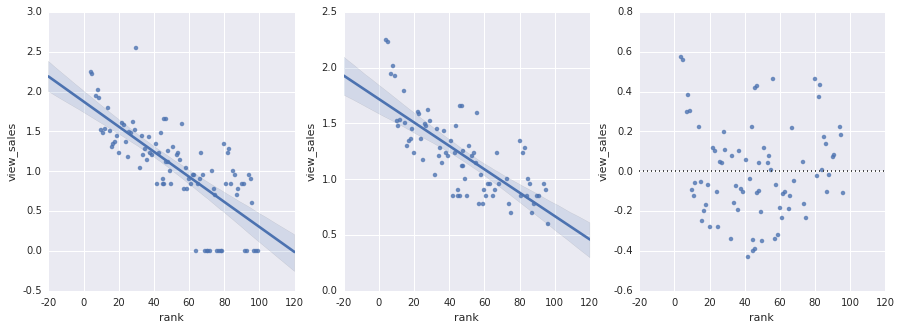

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     95.06
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           4.35e-15
Time:                        17:24:23   Log-Likelihood:                -97.976
No. Observations:                  78   AIC:                             198.0
Df Residuals:                      77   BIC:                             200.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0175      0.002      9.750      0.000         0.014     0.021
==============================================================================
Omnibus:                        2.540   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.062
Skew:                           0.260   Prob(JB):                        0.357
Kurtosis:                       2.397   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
_df = df_y[(df_y['rank']<100) & (df_y['is_ad'] == 'False') & (df_y['is_tmall'] == 'False')]

plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.regplot(_df['rank'], np.log10(_df['view_sales']+1))

plt.subplot(132)
_df = _df[(_df['view_sales']>0) & (_df['view_sales']<10**2.5)]  # 去掉离群点
sns.regplot(_df['rank'], np.log10(_df['view_sales']+1))

plt.subplot(133)
sns.residplot(_df['rank'], np.log10(_df['view_sales']+1))
plt.show()

X, y = _df.ix[:, ['rank']].values, np.log10(_df['view_sales']+1).values
res = sm.OLS(y, X).fit()
res.summary()
# mod.fit(X, y)

去除离群点之后，对排名前100的宝贝的log10(view_sales)和rank做线性回归，得到R^2为0.547，说明有较强的相关性。通过残差图看到排名较靠前的宝贝销售量残差高于均值，意味着销售量与排名的关系更加敏感，甚至超过了指数曲线。

这个结果并不意外，因为在淘宝的搜索排名中，有一部分权重来自销售量（[淘宝2015年下半年搜索排名算法预测解读](http://bbs.paidai.com/topic/392499)）。具体是多少尚不清楚，但是与销售有关的指标占了很大一部分权重。通过调查两个主要竞争店铺的流量来源，发现搜索占了很大一部分。由于来自搜索的流量与排名有直接的关系，排名靠前的宝贝吸引了大量的搜索流量，形成转化，从而也推高了搜索排名，形成正反馈效应。

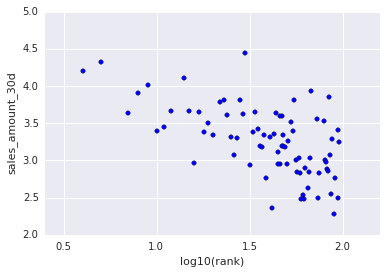

In [27]:
plt.scatter(np.log10(_df['rank']), np.log10(_df['sales_amount_30d']))
plt.xlabel('log10(rank)')
plt.ylabel('sales_amount_30d')
plt.show()

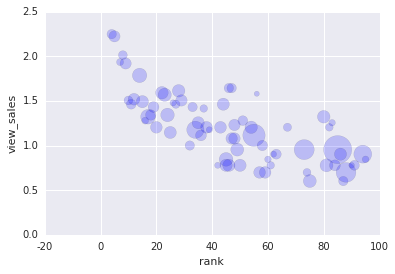

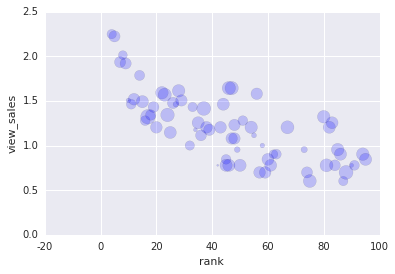

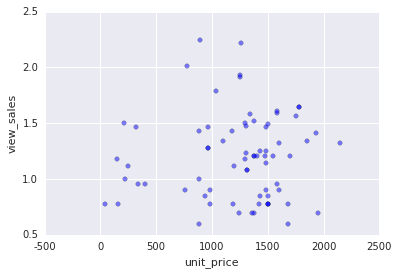

In [76]:
plt.scatter(_df['rank'], np.log10(_df['view_sales']), s=_df['view_price'], alpha=0.2)
plt.xlabel('rank')
plt.ylabel('view_sales')
plt.show()

plt.scatter(_df['rank'], np.log10(_df['view_sales']), s=_df['unit_price']/10, alpha=0.2)
plt.xlabel('rank')
plt.ylabel('view_sales')
plt.show()

_df = _df[_df['unit_price'] < 1e4]
plt.scatter(_df['unit_price'], np.log10(_df['view_sales']), alpha=0.5)
plt.xlabel('unit_price')
plt.ylabel('view_sales')
plt.show()

In [113]:
mask = (df_y['is_ad'] == 'False') & (df_y['is_tmall'] == 'False')
DataFrame(df_y[mask].groupby('is_wild')['view_sales'].describe()).reset_index()\
.pivot_table(index='level_1', columns='is_wild', values='view_sales')

is_wild,False,True
level_1,,
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
count,1249.000000,1760.000000
max,463.000000,352.000000
mean,1.025620,1.927841
min,0.000000,0.000000
std,14.434456,12.220772


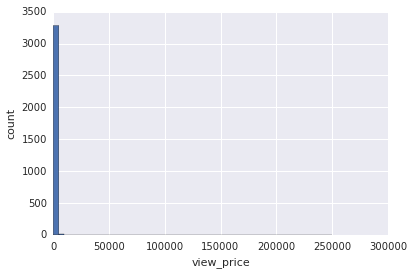

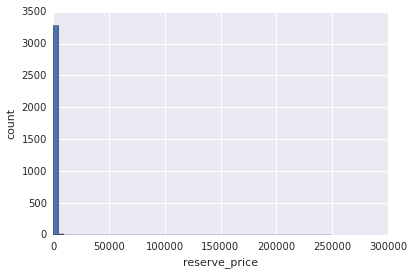

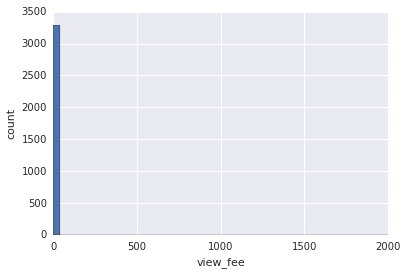

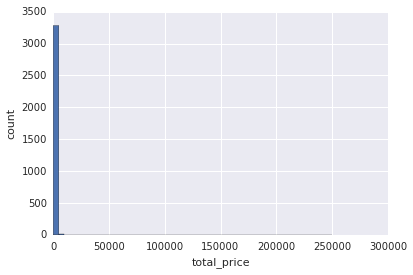

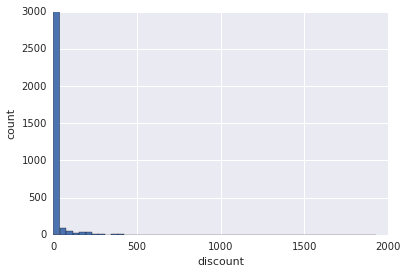

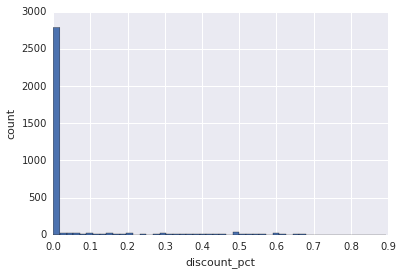

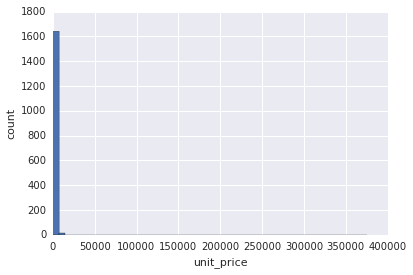

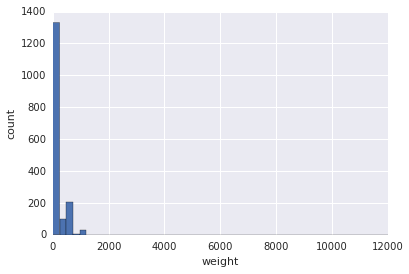

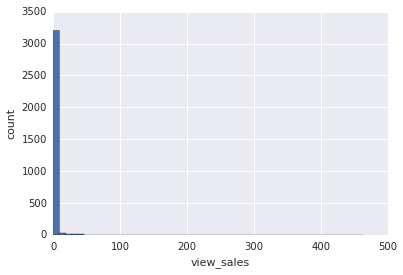

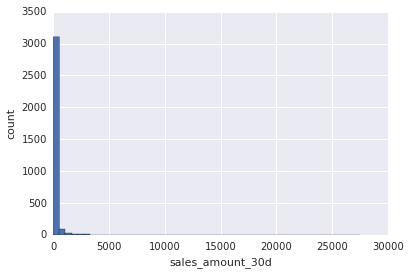

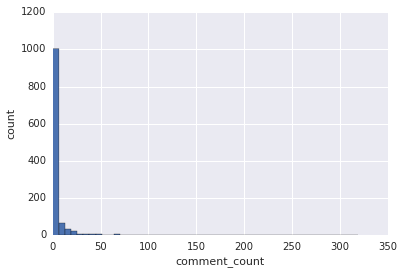

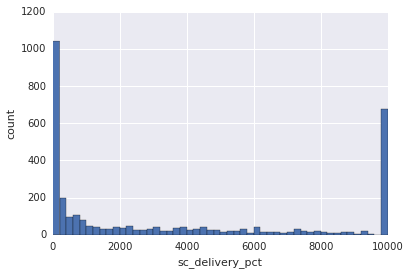

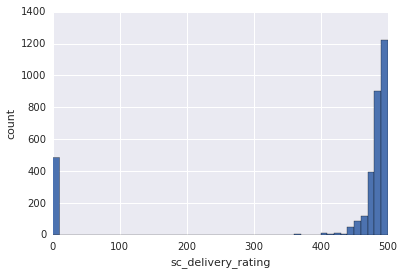

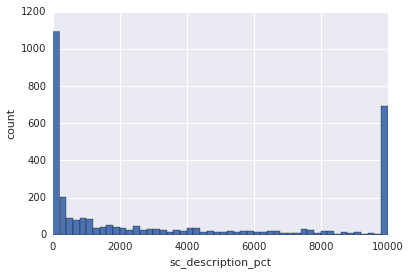

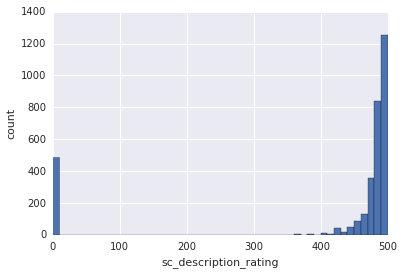

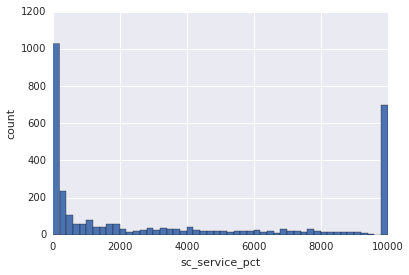

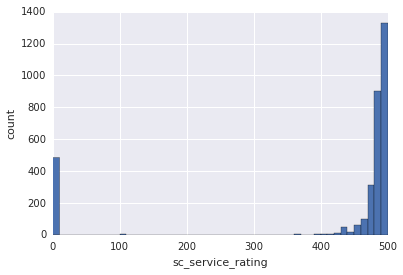

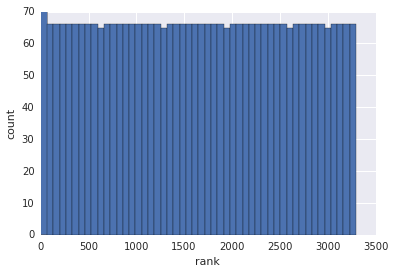

In [116]:
# finer tuned histogram
for v in met_vars:
#     _df = remove_outliers(df_y, v)
    _df = df_y.copy()
    _df[v].hist(bins=50)
    print '\n\n'
    print DataFrame(_df[v].describe()).T
    plt.xlabel(v)
    plt.ylabel('count')
    plt.show()

In [139]:
_df = df_y.copy()
DataFrame(_df.groupby(['shop_name','shop_id'],as_index=1)['sales_amount_30d'].sum()\
    .dropna().sort_values(ascending=0))

,,sales_amount_30d
shop_name,shop_id,
萌兴食品旗舰店,1645965380,71052.20
滇池走廊,78670463,31966.00
hblily2,319704059,29700.00
0搏击蓝天0,649223941,22885.20
shiyuhan0623,859271405,21284.70
藏康堂88,2415998973,20238.00
hensonmen,18137825,19502.00
tb63990020,1636060758,18548.90
tb9266258_2012,879368925,15331.00
